In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np

iris = load_iris()
print iris.feature_names

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [2]:
print type(iris.data)

<type 'numpy.ndarray'>


In [3]:
N = len(iris.target)

test_N = 0.2*N
train_N = N-test_N

idx = np.random.permutation(N)
train_idx = idx[:train_N]
test_idx = idx[train_N:]


train_data = iris.data[train_idx]
train_target = iris.target[train_idx]

test_data = iris.data[test_idx]
test_target = iris.target[test_idx]


C:\Users\eiram\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\eiram\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [4]:

clf = tree.DecisionTreeClassifier()
clf.fit(train_data,train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [5]:
predictions = clf.predict(test_data)
print "predicted labels"
print predictions
print "true labels"
print test_target

print "Accuracy score: %f" %(predictions==test_target).mean()

predicted labels
[0 1 0 2 1 0 2 1 2 2 0 2 0 1 1 2 2 1 0 0 0 0 0 0 1 2 0 1 2 2]
true labels
[0 1 0 2 1 0 2 2 2 2 0 2 0 1 1 2 2 1 0 0 0 0 0 0 1 1 0 1 2 2]
Accuracy score: 0.933333


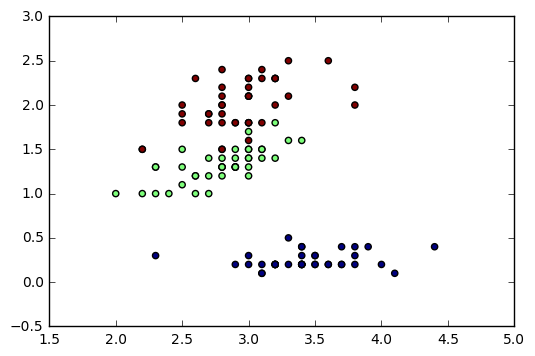

In [6]:
import matplotlib.pyplot as plt

plt.scatter(train_data[:,1],train_data[:,3],c=train_target)
plt.show()

In [7]:
def plot_boundary(X,y,clf,plot_step = 0.02):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    
    

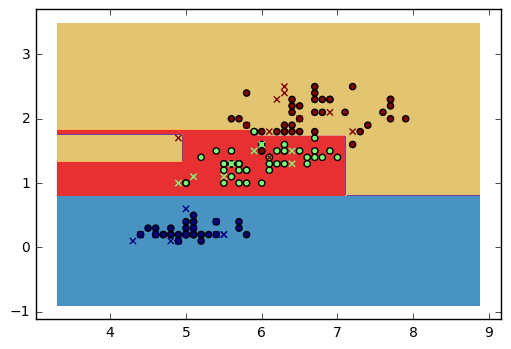

In [11]:
F1 = 0
F2 = 3

X = iris.data[:, [F1,F2]]
y = iris.target


clf = tree.DecisionTreeClassifier()
clf.fit(train_data[:, [F1,F2]],train_target)

plot_boundary(X,y,clf)

plt.scatter(train_data[:,F1],train_data[:,F2],c=train_target,marker='o')

plt.scatter(test_data[:,F1],test_data[:,F2],c=test_target,marker='x')

#plt.scatter()
plt.show()